In [16]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from numpy import sqrt 

#Tien Xu Ly
from sklearn.preprocessing import MinMaxScaler

#Draw Flot
import matplotlib.pyplot as plt

#Cacuale error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

#distance Libaray
from dtw import dtw
from scipy.spatial.distance import euclidean

#FFNN Libarary
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor

In [17]:
def cleanData(df):
    # Replace null values with 0
    df.fillna(0, inplace=True)
    
    # Remove outliers by replacing values outside of 3 standard deviations with the mean
    std = df['Close'].std()
    mean = df['Close'].mean()
    df['Close'] = np.where(df['Close'] > (mean + 10*std), mean, df['Close'])
    df['Close'] = np.where(df['Close'] < (mean - 10*std), mean, df['Close'])
    
    # # Scale data_AMZN to range [0, 1]
    scaler = MinMaxScaler()
    df['Close'] = scaler.fit_transform(df['Close'].values.reshape(-1, 1))
    
    # Fill in missing values with the mean of the previous and next values
    df['Close'] = df['Close'].interpolate(method='linear')
    return df
    

In [18]:
#Xử lý dữ liệu thành dữ liệu đầu vào và đầu ra cho mô hình
def prepare_data(data, size_window,size_predict,stepWindow):
    X, y = [], []
    startWindow = 0
    for i in range(len(data) - size_window - 1):
        if (len(data[(startWindow + size_window):(startWindow + size_window + size_predict) , 0]) != size_predict):
            break
        X.append(data[startWindow:(startWindow + size_window), :])
        y.append(data[(startWindow + size_window):(startWindow + size_window + size_predict) , 0])
        print(data[startWindow:(startWindow + size_window), :])
        print("-----")
        print(data[(startWindow + size_window):(startWindow + size_window + size_predict) , 0])     
       
        startWindow += stepWindow
    return np.array(X), np.array(y)


In [19]:
# create the model
def create_model_FFNN():
    model_FFNN = Sequential()
    model_FFNN.add(Dense(14, input_dim=size_window, activation='sigmoid'))
    model_FFNN.add(Dense(1))
    model_FFNN.compile(loss='mean_squared_error', optimizer='adam')
    return model_FFNN

# 80 train, 20 test

# Tìm Số Neural Lớp Ẩn 

# AVAL

In [33]:
# Load dữ liệu
dataCSV = pd.read_csv('../../Dataset/AVAL.csv')

df=dataCSV[['Close']]
data = cleanData(df)

# Chia dữ liệu thành train set và test set
train_size = int(len(data) * 0.8)
train_data = data.iloc[:train_size, :]
test_data = data.iloc[train_size:, :]

size_window = 7
size_predict=1
stepWindow=1
X_train, y_train = prepare_data(train_data.values, size_window, size_predict, stepWindow)
X_test, y_test = prepare_data(test_data.values, size_window, size_predict, stepWindow)


[[0.97543   ]
 [0.98402947]
 [0.99140053]
 [1.        ]
 [0.98280106]
 [0.97174453]
 [0.96805906]
 [0.96928747]
 [0.97665853]
 [0.97788706]
 [0.97911547]
 [0.97174453]
 [0.95945947]
 [0.95086   ]
 [0.91400494]
 [0.90417694]
 [0.86486493]
 [0.86117935]
 [0.8734644 ]
 [0.87223588]
 [0.88452093]
 [0.88943493]
 [0.90663399]
 [0.90540547]
 [0.91769041]
 [0.93488947]
 [0.95208853]
 [0.95700253]
 [0.96314494]
 [0.955774  ]]
-----
[0.97174453]
[[0.98402947]
 [0.99140053]
 [1.        ]
 [0.98280106]
 [0.97174453]
 [0.96805906]
 [0.96928747]
 [0.97665853]
 [0.97788706]
 [0.97911547]
 [0.97174453]
 [0.95945947]
 [0.95086   ]
 [0.91400494]
 [0.90417694]
 [0.86486493]
 [0.86117935]
 [0.8734644 ]
 [0.87223588]
 [0.88452093]
 [0.88943493]
 [0.90663399]
 [0.90540547]
 [0.91769041]
 [0.93488947]
 [0.95208853]
 [0.95700253]
 [0.96314494]
 [0.955774  ]
 [0.97174453]]
-----
[0.96314494]
[[0.99140053]
 [1.        ]
 [0.98280106]
 [0.97174453]
 [0.96805906]
 [0.96928747]
 [0.97665853]
 [0.97788706]
 [0.9791

[[0.3525799 ]
 [0.3574939 ]
 [0.3574939 ]
 [0.34520884]
 [0.32923831]
 [0.34029484]
 [0.34398031]
 [0.36117937]
 [0.39312043]
 [0.40540538]
 [0.40049138]
 [0.3673219 ]
 [0.35626537]
 [0.33415231]
 [0.3427519 ]
 [0.33906631]
 [0.31203937]
 [0.32432431]
 [0.31695337]
 [0.31572484]
 [0.3574939 ]
 [0.33660937]
 [0.3378379 ]
 [0.33660937]
 [0.3771499 ]
 [0.3673219 ]
 [0.39189191]
 [0.34029484]
 [0.32678137]
 [0.3427519 ]]
-----
[0.34520884]
[[0.3574939 ]
 [0.3574939 ]
 [0.34520884]
 [0.32923831]
 [0.34029484]
 [0.34398031]
 [0.36117937]
 [0.39312043]
 [0.40540538]
 [0.40049138]
 [0.3673219 ]
 [0.35626537]
 [0.33415231]
 [0.3427519 ]
 [0.33906631]
 [0.31203937]
 [0.32432431]
 [0.31695337]
 [0.31572484]
 [0.3574939 ]
 [0.33660937]
 [0.3378379 ]
 [0.33660937]
 [0.3771499 ]
 [0.3673219 ]
 [0.39189191]
 [0.34029484]
 [0.32678137]
 [0.3427519 ]
 [0.34520884]]
-----
[0.33660937]
[[0.3574939 ]
 [0.34520884]
 [0.32923831]
 [0.34029484]
 [0.34398031]
 [0.36117937]
 [0.39312043]
 [0.40540538]
 [0.4004

In [34]:
epochArr = [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230, 240,250,260,270,280,290, 300]

In [35]:
df_MseWith_Neural = pd.DataFrame([],  columns =  ["Epoch", "MSE"])
for epoch in epochArr:
    # create the model
    model_FFNN = create_model_FFNN()
    model_FFNN.fit(X_train, y_train, epochs=epoch, batch_size=8, verbose=2, callbacks=[EarlyStopping(monitor='loss', patience=10)], shuffle=False)
    # make predictions on the test set
    predictions_FFNN = model_FFNN.predict(X_test)
    # get the best weights from the model
    best_weights_FFNN = model_FFNN.get_weights()
    
    # create the model
    model_FFNN1 = Sequential()
    model_FFNN1.add(Dense(14, input_dim=size_window, activation='sigmoid'))
    model_FFNN1.add(Dense(1))
    model_FFNN1.set_weights(best_weights_FFNN)
    model_FFNN1.compile(loss='mean_squared_error', optimizer='adam')
    y_pred= model_FFNN1.predict(X_test)
    rowMseWithNeural = pd.Series([epoch, mean_squared_error(y_test , y_pred)], index=df_MseWith_Neural.columns)
    df_MseWith_Neural = df_MseWith_Neural.append(rowMseWithNeural,ignore_index=True)   
    print('--------------- \n')

Epoch 1/10
97/97 - 1s - loss: 0.0805 - 679ms/epoch - 7ms/step
Epoch 2/10
97/97 - 0s - loss: 0.0512 - 123ms/epoch - 1ms/step
Epoch 3/10
97/97 - 0s - loss: 0.0310 - 136ms/epoch - 1ms/step
Epoch 4/10
97/97 - 0s - loss: 0.0196 - 142ms/epoch - 1ms/step
Epoch 5/10
97/97 - 0s - loss: 0.0136 - 121ms/epoch - 1ms/step
Epoch 6/10
97/97 - 0s - loss: 0.0102 - 112ms/epoch - 1ms/step
Epoch 7/10
97/97 - 0s - loss: 0.0082 - 106ms/epoch - 1ms/step
Epoch 8/10
97/97 - 0s - loss: 0.0070 - 122ms/epoch - 1ms/step
Epoch 9/10
97/97 - 0s - loss: 0.0061 - 124ms/epoch - 1ms/step
Epoch 10/10
97/97 - 0s - loss: 0.0054 - 124ms/epoch - 1ms/step
6/6 [==============================] - 0s 2ms/step
--------------- 

Epoch 1/20
97/97 - 1s - loss: 0.0544 - 536ms/epoch - 6ms/step
Epoch 2/20
97/97 - 0s - loss: 0.0089 - 120ms/epoch - 1ms/step
Epoch 3/20
97/97 - 0s - loss: 0.0069 - 118ms/epoch - 1ms/step
Epoch 4/20
97/97 - 0s - loss: 0.0059 - 122ms/epoch - 1ms/step
Epoch 5/20
97/97 - 0s - loss: 0.0053 - 113ms/epoch - 1ms/step


97/97 - 0s - loss: 0.0030 - 103ms/epoch - 1ms/step
Epoch 25/50
97/97 - 0s - loss: 0.0030 - 107ms/epoch - 1ms/step
Epoch 26/50
97/97 - 0s - loss: 0.0029 - 102ms/epoch - 1ms/step
Epoch 27/50
97/97 - 0s - loss: 0.0028 - 109ms/epoch - 1ms/step
Epoch 28/50
97/97 - 0s - loss: 0.0028 - 122ms/epoch - 1ms/step
Epoch 29/50
97/97 - 0s - loss: 0.0027 - 102ms/epoch - 1ms/step
Epoch 30/50
97/97 - 0s - loss: 0.0027 - 107ms/epoch - 1ms/step
Epoch 31/50
97/97 - 0s - loss: 0.0026 - 107ms/epoch - 1ms/step
Epoch 32/50
97/97 - 0s - loss: 0.0026 - 106ms/epoch - 1ms/step
Epoch 33/50
97/97 - 0s - loss: 0.0025 - 113ms/epoch - 1ms/step
Epoch 34/50
97/97 - 0s - loss: 0.0025 - 114ms/epoch - 1ms/step
Epoch 35/50
97/97 - 0s - loss: 0.0024 - 121ms/epoch - 1ms/step
Epoch 36/50
97/97 - 0s - loss: 0.0024 - 106ms/epoch - 1ms/step
Epoch 37/50
97/97 - 0s - loss: 0.0023 - 107ms/epoch - 1ms/step
Epoch 38/50
97/97 - 0s - loss: 0.0022 - 116ms/epoch - 1ms/step
Epoch 39/50
97/97 - 0s - loss: 0.0022 - 111ms/epoch - 1ms/step
Epoc

Epoch 41/70
97/97 - 0s - loss: 0.0011 - 104ms/epoch - 1ms/step
Epoch 42/70
97/97 - 0s - loss: 0.0011 - 109ms/epoch - 1ms/step
Epoch 43/70
97/97 - 0s - loss: 0.0011 - 122ms/epoch - 1ms/step
Epoch 44/70
97/97 - 0s - loss: 0.0011 - 103ms/epoch - 1ms/step
Epoch 45/70
97/97 - 0s - loss: 0.0011 - 107ms/epoch - 1ms/step
Epoch 46/70
97/97 - 0s - loss: 0.0011 - 105ms/epoch - 1ms/step
Epoch 47/70
97/97 - 0s - loss: 0.0011 - 106ms/epoch - 1ms/step
Epoch 48/70
97/97 - 0s - loss: 0.0011 - 101ms/epoch - 1ms/step
Epoch 49/70
97/97 - 0s - loss: 0.0011 - 112ms/epoch - 1ms/step
Epoch 50/70
97/97 - 0s - loss: 0.0011 - 107ms/epoch - 1ms/step
Epoch 51/70
97/97 - 0s - loss: 0.0011 - 106ms/epoch - 1ms/step
Epoch 52/70
97/97 - 0s - loss: 0.0011 - 106ms/epoch - 1ms/step
Epoch 53/70
97/97 - 0s - loss: 0.0011 - 119ms/epoch - 1ms/step
Epoch 54/70
97/97 - 0s - loss: 0.0011 - 107ms/epoch - 1ms/step
Epoch 55/70
97/97 - 0s - loss: 0.0011 - 107ms/epoch - 1ms/step
Epoch 56/70
97/97 - 0s - loss: 0.0011 - 107ms/epoch - 1

Epoch 29/90
97/97 - 0s - loss: 0.0028 - 107ms/epoch - 1ms/step
Epoch 30/90
97/97 - 0s - loss: 0.0027 - 105ms/epoch - 1ms/step
Epoch 31/90
97/97 - 0s - loss: 0.0026 - 109ms/epoch - 1ms/step
Epoch 32/90
97/97 - 0s - loss: 0.0025 - 106ms/epoch - 1ms/step
Epoch 33/90
97/97 - 0s - loss: 0.0025 - 123ms/epoch - 1ms/step
Epoch 34/90
97/97 - 0s - loss: 0.0024 - 102ms/epoch - 1ms/step
Epoch 35/90
97/97 - 0s - loss: 0.0023 - 106ms/epoch - 1ms/step
Epoch 36/90
97/97 - 0s - loss: 0.0022 - 107ms/epoch - 1ms/step
Epoch 37/90
97/97 - 0s - loss: 0.0022 - 120ms/epoch - 1ms/step
Epoch 38/90
97/97 - 0s - loss: 0.0021 - 100ms/epoch - 1ms/step
Epoch 39/90
97/97 - 0s - loss: 0.0021 - 98ms/epoch - 1ms/step
Epoch 40/90
97/97 - 0s - loss: 0.0020 - 105ms/epoch - 1ms/step
Epoch 41/90
97/97 - 0s - loss: 0.0020 - 106ms/epoch - 1ms/step
Epoch 42/90
97/97 - 0s - loss: 0.0019 - 107ms/epoch - 1ms/step
Epoch 43/90
97/97 - 0s - loss: 0.0019 - 120ms/epoch - 1ms/step
Epoch 44/90
97/97 - 0s - loss: 0.0019 - 107ms/epoch - 1m

Epoch 67/100
97/97 - 0s - loss: 0.0011 - 107ms/epoch - 1ms/step
Epoch 68/100
97/97 - 0s - loss: 0.0011 - 108ms/epoch - 1ms/step
Epoch 69/100
97/97 - 0s - loss: 0.0010 - 103ms/epoch - 1ms/step
Epoch 70/100
97/97 - 0s - loss: 0.0010 - 109ms/epoch - 1ms/step
Epoch 71/100
97/97 - 0s - loss: 0.0010 - 120ms/epoch - 1ms/step
Epoch 72/100
97/97 - 0s - loss: 0.0010 - 107ms/epoch - 1ms/step
Epoch 73/100
97/97 - 0s - loss: 0.0010 - 107ms/epoch - 1ms/step
Epoch 74/100
97/97 - 0s - loss: 0.0010 - 120ms/epoch - 1ms/step
Epoch 75/100
97/97 - 0s - loss: 0.0010 - 107ms/epoch - 1ms/step
Epoch 76/100
97/97 - 0s - loss: 0.0010 - 107ms/epoch - 1ms/step
Epoch 77/100
97/97 - 0s - loss: 0.0010 - 106ms/epoch - 1ms/step
Epoch 78/100
97/97 - 0s - loss: 0.0010 - 126ms/epoch - 1ms/step
Epoch 79/100
97/97 - 0s - loss: 0.0010 - 99ms/epoch - 1ms/step
Epoch 80/100
97/97 - 0s - loss: 0.0010 - 107ms/epoch - 1ms/step
Epoch 81/100
97/97 - 0s - loss: 9.9768e-04 - 106ms/epoch - 1ms/step
Epoch 82/100
97/97 - 0s - loss: 9.943

97/97 - 0s - loss: 9.6015e-04 - 107ms/epoch - 1ms/step
Epoch 92/110
97/97 - 0s - loss: 9.5754e-04 - 136ms/epoch - 1ms/step
Epoch 93/110
97/97 - 0s - loss: 9.5495e-04 - 117ms/epoch - 1ms/step
Epoch 94/110
97/97 - 0s - loss: 9.5239e-04 - 107ms/epoch - 1ms/step
Epoch 95/110
97/97 - 0s - loss: 9.4987e-04 - 107ms/epoch - 1ms/step
Epoch 96/110
97/97 - 0s - loss: 9.4737e-04 - 126ms/epoch - 1ms/step
Epoch 97/110
97/97 - 0s - loss: 9.4490e-04 - 130ms/epoch - 1ms/step
Epoch 98/110
97/97 - 0s - loss: 9.4246e-04 - 102ms/epoch - 1ms/step
Epoch 99/110
97/97 - 0s - loss: 9.4006e-04 - 107ms/epoch - 1ms/step
Epoch 100/110
97/97 - 0s - loss: 9.3769e-04 - 122ms/epoch - 1ms/step
Epoch 101/110
97/97 - 0s - loss: 9.3535e-04 - 149ms/epoch - 2ms/step
Epoch 102/110
97/97 - 0s - loss: 9.3304e-04 - 102ms/epoch - 1ms/step
Epoch 103/110
97/97 - 0s - loss: 9.3076e-04 - 107ms/epoch - 1ms/step
Epoch 104/110
97/97 - 0s - loss: 9.2851e-04 - 107ms/epoch - 1ms/step
Epoch 105/110
97/97 - 0s - loss: 9.2629e-04 - 126ms/epoc

97/97 - 0s - loss: 9.5697e-04 - 121ms/epoch - 1ms/step
Epoch 106/120
97/97 - 0s - loss: 9.5452e-04 - 102ms/epoch - 1ms/step
Epoch 107/120
97/97 - 0s - loss: 9.5210e-04 - 111ms/epoch - 1ms/step
Epoch 108/120
97/97 - 0s - loss: 9.4972e-04 - 107ms/epoch - 1ms/step
Epoch 109/120
97/97 - 0s - loss: 9.4738e-04 - 106ms/epoch - 1ms/step
Epoch 110/120
97/97 - 0s - loss: 9.4507e-04 - 107ms/epoch - 1ms/step
Epoch 111/120
97/97 - 0s - loss: 9.4279e-04 - 103ms/epoch - 1ms/step
Epoch 112/120
97/97 - 0s - loss: 9.4055e-04 - 109ms/epoch - 1ms/step
Epoch 113/120
97/97 - 0s - loss: 9.3834e-04 - 120ms/epoch - 1ms/step
Epoch 114/120
97/97 - 0s - loss: 9.3616e-04 - 104ms/epoch - 1ms/step
Epoch 115/120
97/97 - 0s - loss: 9.3401e-04 - 109ms/epoch - 1ms/step
Epoch 116/120
97/97 - 0s - loss: 9.3189e-04 - 107ms/epoch - 1ms/step
Epoch 117/120
97/97 - 0s - loss: 9.2980e-04 - 120ms/epoch - 1ms/step
Epoch 118/120
97/97 - 0s - loss: 9.2774e-04 - 138ms/epoch - 1ms/step
Epoch 119/120
97/97 - 0s - loss: 9.2570e-04 - 11

Epoch 109/130
97/97 - 0s - loss: 9.0221e-04 - 120ms/epoch - 1ms/step
Epoch 110/130
97/97 - 0s - loss: 9.0018e-04 - 107ms/epoch - 1ms/step
Epoch 111/130
97/97 - 0s - loss: 8.9818e-04 - 138ms/epoch - 1ms/step
Epoch 112/130
97/97 - 0s - loss: 8.9620e-04 - 111ms/epoch - 1ms/step
Epoch 113/130
97/97 - 0s - loss: 8.9426e-04 - 111ms/epoch - 1ms/step
Epoch 114/130
97/97 - 0s - loss: 8.9234e-04 - 107ms/epoch - 1ms/step
Epoch 115/130
97/97 - 0s - loss: 8.9045e-04 - 107ms/epoch - 1ms/step
Epoch 116/130
97/97 - 0s - loss: 8.8859e-04 - 106ms/epoch - 1ms/step
Epoch 117/130
97/97 - 0s - loss: 8.8675e-04 - 105ms/epoch - 1ms/step
Epoch 118/130
97/97 - 0s - loss: 8.8493e-04 - 107ms/epoch - 1ms/step
Epoch 119/130
97/97 - 0s - loss: 8.8314e-04 - 120ms/epoch - 1ms/step
Epoch 120/130
97/97 - 0s - loss: 8.8137e-04 - 107ms/epoch - 1ms/step
Epoch 121/130
97/97 - 0s - loss: 8.7961e-04 - 117ms/epoch - 1ms/step
Epoch 122/130
97/97 - 0s - loss: 8.7788e-04 - 109ms/epoch - 1ms/step
Epoch 123/130
97/97 - 0s - loss: 8

Epoch 102/140
97/97 - 0s - loss: 8.6833e-04 - 105ms/epoch - 1ms/step
Epoch 103/140
97/97 - 0s - loss: 8.6636e-04 - 112ms/epoch - 1ms/step
Epoch 104/140
97/97 - 0s - loss: 8.6442e-04 - 100ms/epoch - 1ms/step
Epoch 105/140
97/97 - 0s - loss: 8.6249e-04 - 108ms/epoch - 1ms/step
Epoch 106/140
97/97 - 0s - loss: 8.6057e-04 - 105ms/epoch - 1ms/step
Epoch 107/140
97/97 - 0s - loss: 8.5866e-04 - 120ms/epoch - 1ms/step
Epoch 108/140
97/97 - 0s - loss: 8.5676e-04 - 115ms/epoch - 1ms/step
Epoch 109/140
97/97 - 0s - loss: 8.5486e-04 - 98ms/epoch - 1ms/step
Epoch 110/140
97/97 - 0s - loss: 8.5298e-04 - 120ms/epoch - 1ms/step
Epoch 111/140
97/97 - 0s - loss: 8.5110e-04 - 104ms/epoch - 1ms/step
Epoch 112/140
97/97 - 0s - loss: 8.4922e-04 - 109ms/epoch - 1ms/step
Epoch 113/140
97/97 - 0s - loss: 8.4734e-04 - 120ms/epoch - 1ms/step
Epoch 114/140
97/97 - 0s - loss: 8.4547e-04 - 107ms/epoch - 1ms/step
Epoch 115/140
97/97 - 0s - loss: 8.4361e-04 - 106ms/epoch - 1ms/step
Epoch 116/140
97/97 - 0s - loss: 8.

Epoch 84/150
97/97 - 0s - loss: 9.1673e-04 - 106ms/epoch - 1ms/step
Epoch 85/150
97/97 - 0s - loss: 9.1440e-04 - 107ms/epoch - 1ms/step
Epoch 86/150
97/97 - 0s - loss: 9.1213e-04 - 120ms/epoch - 1ms/step
Epoch 87/150
97/97 - 0s - loss: 9.0992e-04 - 105ms/epoch - 1ms/step
Epoch 88/150
97/97 - 0s - loss: 9.0776e-04 - 106ms/epoch - 1ms/step
Epoch 89/150
97/97 - 0s - loss: 9.0565e-04 - 107ms/epoch - 1ms/step
Epoch 90/150
97/97 - 0s - loss: 9.0358e-04 - 106ms/epoch - 1ms/step
Epoch 91/150
97/97 - 0s - loss: 9.0155e-04 - 113ms/epoch - 1ms/step
Epoch 92/150
97/97 - 0s - loss: 8.9957e-04 - 114ms/epoch - 1ms/step
Epoch 93/150
97/97 - 0s - loss: 8.9762e-04 - 107ms/epoch - 1ms/step
Epoch 94/150
97/97 - 0s - loss: 8.9570e-04 - 106ms/epoch - 1ms/step
Epoch 95/150
97/97 - 0s - loss: 8.9382e-04 - 102ms/epoch - 1ms/step
Epoch 96/150
97/97 - 0s - loss: 8.9197e-04 - 106ms/epoch - 1ms/step
Epoch 97/150
97/97 - 0s - loss: 8.9014e-04 - 109ms/epoch - 1ms/step
Epoch 98/150
97/97 - 0s - loss: 8.8834e-04 - 120

Epoch 56/160
97/97 - 0s - loss: 0.0011 - 120ms/epoch - 1ms/step
Epoch 57/160
97/97 - 0s - loss: 0.0011 - 107ms/epoch - 1ms/step
Epoch 58/160
97/97 - 0s - loss: 0.0011 - 104ms/epoch - 1ms/step
Epoch 59/160
97/97 - 0s - loss: 0.0011 - 108ms/epoch - 1ms/step
Epoch 60/160
97/97 - 0s - loss: 0.0011 - 106ms/epoch - 1ms/step
Epoch 61/160
97/97 - 0s - loss: 0.0011 - 104ms/epoch - 1ms/step
Epoch 62/160
97/97 - 0s - loss: 0.0011 - 120ms/epoch - 1ms/step
Epoch 63/160
97/97 - 0s - loss: 0.0011 - 108ms/epoch - 1ms/step
Epoch 64/160
97/97 - 0s - loss: 0.0011 - 107ms/epoch - 1ms/step
Epoch 65/160
97/97 - 0s - loss: 0.0011 - 107ms/epoch - 1ms/step
Epoch 66/160
97/97 - 0s - loss: 0.0011 - 106ms/epoch - 1ms/step
Epoch 67/160
97/97 - 0s - loss: 0.0011 - 124ms/epoch - 1ms/step
Epoch 68/160
97/97 - 0s - loss: 0.0011 - 100ms/epoch - 1ms/step
Epoch 69/160
97/97 - 0s - loss: 0.0011 - 107ms/epoch - 1ms/step
Epoch 70/160
97/97 - 0s - loss: 0.0011 - 106ms/epoch - 1ms/step
Epoch 71/160
97/97 - 0s - loss: 0.0011 -

Epoch 18/170
97/97 - 0s - loss: 0.0017 - 106ms/epoch - 1ms/step
Epoch 19/170
97/97 - 0s - loss: 0.0017 - 107ms/epoch - 1ms/step
Epoch 20/170
97/97 - 0s - loss: 0.0016 - 120ms/epoch - 1ms/step
Epoch 21/170
97/97 - 0s - loss: 0.0016 - 107ms/epoch - 1ms/step
Epoch 22/170
97/97 - 0s - loss: 0.0015 - 107ms/epoch - 1ms/step
Epoch 23/170
97/97 - 0s - loss: 0.0015 - 106ms/epoch - 1ms/step
Epoch 24/170
97/97 - 0s - loss: 0.0014 - 105ms/epoch - 1ms/step
Epoch 25/170
97/97 - 0s - loss: 0.0014 - 104ms/epoch - 1ms/step
Epoch 26/170
97/97 - 0s - loss: 0.0014 - 109ms/epoch - 1ms/step
Epoch 27/170
97/97 - 0s - loss: 0.0013 - 107ms/epoch - 1ms/step
Epoch 28/170
97/97 - 0s - loss: 0.0013 - 106ms/epoch - 1ms/step
Epoch 29/170
97/97 - 0s - loss: 0.0013 - 123ms/epoch - 1ms/step
Epoch 30/170
97/97 - 0s - loss: 0.0013 - 100ms/epoch - 1ms/step
Epoch 31/170
97/97 - 0s - loss: 0.0012 - 106ms/epoch - 1ms/step
Epoch 32/170
97/97 - 0s - loss: 0.0012 - 120ms/epoch - 1ms/step
Epoch 33/170
97/97 - 0s - loss: 0.0012 -

Epoch 141/170
97/97 - 0s - loss: 7.8815e-04 - 93ms/epoch - 962us/step
Epoch 142/170
97/97 - 0s - loss: 7.8642e-04 - 107ms/epoch - 1ms/step
Epoch 143/170
97/97 - 0s - loss: 7.8474e-04 - 104ms/epoch - 1ms/step
Epoch 144/170
97/97 - 0s - loss: 7.8309e-04 - 109ms/epoch - 1ms/step
Epoch 145/170
97/97 - 0s - loss: 7.8147e-04 - 120ms/epoch - 1ms/step
Epoch 146/170
97/97 - 0s - loss: 7.7990e-04 - 104ms/epoch - 1ms/step
Epoch 147/170
97/97 - 0s - loss: 7.7837e-04 - 107ms/epoch - 1ms/step
Epoch 148/170
97/97 - 0s - loss: 7.7687e-04 - 107ms/epoch - 1ms/step
Epoch 149/170
97/97 - 0s - loss: 7.7542e-04 - 106ms/epoch - 1ms/step
Epoch 150/170
97/97 - 0s - loss: 7.7400e-04 - 113ms/epoch - 1ms/step
Epoch 151/170
97/97 - 0s - loss: 7.7262e-04 - 114ms/epoch - 1ms/step
Epoch 152/170
97/97 - 0s - loss: 7.7128e-04 - 106ms/epoch - 1ms/step
Epoch 153/170
97/97 - 0s - loss: 7.6998e-04 - 120ms/epoch - 1ms/step
Epoch 154/170
97/97 - 0s - loss: 7.6872e-04 - 107ms/epoch - 1ms/step
Epoch 155/170
97/97 - 0s - loss: 

97/97 - 0s - loss: 0.0019 - 121ms/epoch - 1ms/step
Epoch 25/190
97/97 - 0s - loss: 0.0018 - 107ms/epoch - 1ms/step
Epoch 26/190
97/97 - 0s - loss: 0.0018 - 114ms/epoch - 1ms/step
Epoch 27/190
97/97 - 0s - loss: 0.0017 - 98ms/epoch - 1ms/step
Epoch 28/190
97/97 - 0s - loss: 0.0017 - 107ms/epoch - 1ms/step
Epoch 29/190
97/97 - 0s - loss: 0.0016 - 105ms/epoch - 1ms/step
Epoch 30/190
97/97 - 0s - loss: 0.0016 - 107ms/epoch - 1ms/step
Epoch 31/190
97/97 - 0s - loss: 0.0016 - 115ms/epoch - 1ms/step
Epoch 32/190
97/97 - 0s - loss: 0.0015 - 111ms/epoch - 1ms/step
Epoch 33/190
97/97 - 0s - loss: 0.0015 - 107ms/epoch - 1ms/step
Epoch 34/190
97/97 - 0s - loss: 0.0015 - 107ms/epoch - 1ms/step
Epoch 35/190
97/97 - 0s - loss: 0.0014 - 106ms/epoch - 1ms/step
Epoch 36/190
97/97 - 0s - loss: 0.0014 - 120ms/epoch - 1ms/step
Epoch 37/190
97/97 - 0s - loss: 0.0014 - 107ms/epoch - 1ms/step
Epoch 38/190
97/97 - 0s - loss: 0.0014 - 106ms/epoch - 1ms/step
Epoch 39/190
97/97 - 0s - loss: 0.0013 - 120ms/epoch -

Epoch 147/190
97/97 - 0s - loss: 7.7447e-04 - 107ms/epoch - 1ms/step
Epoch 148/190
97/97 - 0s - loss: 7.7336e-04 - 107ms/epoch - 1ms/step
Epoch 149/190
97/97 - 0s - loss: 7.7226e-04 - 106ms/epoch - 1ms/step
Epoch 150/190
97/97 - 0s - loss: 7.7119e-04 - 107ms/epoch - 1ms/step
Epoch 151/190
97/97 - 0s - loss: 7.7015e-04 - 121ms/epoch - 1ms/step
Epoch 152/190
97/97 - 0s - loss: 7.6913e-04 - 106ms/epoch - 1ms/step
Epoch 153/190
97/97 - 0s - loss: 7.6814e-04 - 107ms/epoch - 1ms/step
Epoch 154/190
97/97 - 0s - loss: 7.6717e-04 - 106ms/epoch - 1ms/step
Epoch 155/190
97/97 - 0s - loss: 7.6623e-04 - 107ms/epoch - 1ms/step
Epoch 156/190
97/97 - 0s - loss: 7.6531e-04 - 120ms/epoch - 1ms/step
Epoch 157/190
97/97 - 0s - loss: 7.6442e-04 - 107ms/epoch - 1ms/step
Epoch 158/190
97/97 - 0s - loss: 7.6355e-04 - 107ms/epoch - 1ms/step
Epoch 159/190
97/97 - 0s - loss: 7.6271e-04 - 128ms/epoch - 1ms/step
Epoch 160/190
97/97 - 0s - loss: 7.6190e-04 - 97ms/epoch - 1ms/step
Epoch 161/190
97/97 - 0s - loss: 7.

Epoch 80/200
97/97 - 0s - loss: 0.0010 - 107ms/epoch - 1ms/step
Epoch 81/200
97/97 - 0s - loss: 0.0010 - 108ms/epoch - 1ms/step
Epoch 82/200
97/97 - 0s - loss: 0.0010 - 106ms/epoch - 1ms/step
Epoch 83/200
97/97 - 0s - loss: 0.0010 - 100ms/epoch - 1ms/step
Epoch 84/200
97/97 - 0s - loss: 0.0010 - 106ms/epoch - 1ms/step
Epoch 85/200
97/97 - 0s - loss: 0.0010 - 105ms/epoch - 1ms/step
Epoch 86/200
97/97 - 0s - loss: 0.0010 - 107ms/epoch - 1ms/step
Epoch 87/200
97/97 - 0s - loss: 0.0010 - 116ms/epoch - 1ms/step
Epoch 88/200
97/97 - 0s - loss: 0.0010 - 96ms/epoch - 989us/step
Epoch 89/200
97/97 - 0s - loss: 0.0010 - 122ms/epoch - 1ms/step
Epoch 90/200
97/97 - 0s - loss: 0.0010 - 152ms/epoch - 2ms/step
Epoch 91/200
97/97 - 0s - loss: 0.0010 - 132ms/epoch - 1ms/step
Epoch 92/200
97/97 - 0s - loss: 0.0010 - 97ms/epoch - 999us/step
Epoch 93/200
97/97 - 0s - loss: 9.9912e-04 - 107ms/epoch - 1ms/step
Epoch 94/200
97/97 - 0s - loss: 9.9512e-04 - 107ms/epoch - 1ms/step
Epoch 95/200
97/97 - 0s - loss

Epoch 200/200
97/97 - 0s - loss: 8.1843e-04 - 106ms/epoch - 1ms/step
6/6 [==============================] - 0s 2ms/step
--------------- 

Epoch 1/210
97/97 - 1s - loss: 0.0796 - 549ms/epoch - 6ms/step
Epoch 2/210
97/97 - 0s - loss: 0.0042 - 114ms/epoch - 1ms/step
Epoch 3/210
97/97 - 0s - loss: 0.0038 - 120ms/epoch - 1ms/step
Epoch 4/210
97/97 - 0s - loss: 0.0035 - 121ms/epoch - 1ms/step
Epoch 5/210
97/97 - 0s - loss: 0.0034 - 131ms/epoch - 1ms/step
Epoch 6/210
97/97 - 0s - loss: 0.0033 - 136ms/epoch - 1ms/step
Epoch 7/210
97/97 - 0s - loss: 0.0032 - 133ms/epoch - 1ms/step
Epoch 8/210
97/97 - 0s - loss: 0.0031 - 118ms/epoch - 1ms/step
Epoch 9/210
97/97 - 0s - loss: 0.0030 - 102ms/epoch - 1ms/step
Epoch 10/210
97/97 - 0s - loss: 0.0030 - 109ms/epoch - 1ms/step
Epoch 11/210
97/97 - 0s - loss: 0.0029 - 107ms/epoch - 1ms/step
Epoch 12/210
97/97 - 0s - loss: 0.0028 - 107ms/epoch - 1ms/step
Epoch 13/210
97/97 - 0s - loss: 0.0028 - 106ms/epoch - 1ms/step
Epoch 14/210
97/97 - 0s - loss: 0.0027 

Epoch 124/210
97/97 - 0s - loss: 9.1448e-04 - 105ms/epoch - 1ms/step
Epoch 125/210
97/97 - 0s - loss: 9.1234e-04 - 107ms/epoch - 1ms/step
Epoch 126/210
97/97 - 0s - loss: 9.1022e-04 - 104ms/epoch - 1ms/step
Epoch 127/210
97/97 - 0s - loss: 9.0813e-04 - 118ms/epoch - 1ms/step
Epoch 128/210
97/97 - 0s - loss: 9.0607e-04 - 96ms/epoch - 989us/step
Epoch 129/210
97/97 - 0s - loss: 9.0404e-04 - 106ms/epoch - 1ms/step
Epoch 130/210
97/97 - 0s - loss: 9.0204e-04 - 107ms/epoch - 1ms/step
Epoch 131/210
97/97 - 0s - loss: 9.0006e-04 - 120ms/epoch - 1ms/step
Epoch 132/210
97/97 - 0s - loss: 8.9812e-04 - 113ms/epoch - 1ms/step
Epoch 133/210
97/97 - 0s - loss: 8.9621e-04 - 100ms/epoch - 1ms/step
Epoch 134/210
97/97 - 0s - loss: 8.9432e-04 - 107ms/epoch - 1ms/step
Epoch 135/210
97/97 - 0s - loss: 8.9247e-04 - 107ms/epoch - 1ms/step
Epoch 136/210
97/97 - 0s - loss: 8.9065e-04 - 107ms/epoch - 1ms/step
Epoch 137/210
97/97 - 0s - loss: 8.8886e-04 - 130ms/epoch - 1ms/step
Epoch 138/210
97/97 - 0s - loss: 

Epoch 34/220
97/97 - 0s - loss: 0.0019 - 105ms/epoch - 1ms/step
Epoch 35/220
97/97 - 0s - loss: 0.0018 - 109ms/epoch - 1ms/step
Epoch 36/220
97/97 - 0s - loss: 0.0018 - 107ms/epoch - 1ms/step
Epoch 37/220
97/97 - 0s - loss: 0.0017 - 107ms/epoch - 1ms/step
Epoch 38/220
97/97 - 0s - loss: 0.0017 - 120ms/epoch - 1ms/step
Epoch 39/220
97/97 - 0s - loss: 0.0016 - 104ms/epoch - 1ms/step
Epoch 40/220
97/97 - 0s - loss: 0.0016 - 109ms/epoch - 1ms/step
Epoch 41/220
97/97 - 0s - loss: 0.0016 - 100ms/epoch - 1ms/step
Epoch 42/220
97/97 - 0s - loss: 0.0015 - 107ms/epoch - 1ms/step
Epoch 43/220
97/97 - 0s - loss: 0.0015 - 107ms/epoch - 1ms/step
Epoch 44/220
97/97 - 0s - loss: 0.0014 - 106ms/epoch - 1ms/step
Epoch 45/220
97/97 - 0s - loss: 0.0014 - 120ms/epoch - 1ms/step
Epoch 46/220
97/97 - 0s - loss: 0.0013 - 105ms/epoch - 1ms/step
Epoch 47/220
97/97 - 0s - loss: 0.0013 - 107ms/epoch - 1ms/step
Epoch 48/220
97/97 - 0s - loss: 0.0013 - 107ms/epoch - 1ms/step
Epoch 49/220
97/97 - 0s - loss: 0.0012 -

Epoch 156/220
97/97 - 0s - loss: 8.4292e-04 - 119ms/epoch - 1ms/step
Epoch 157/220
97/97 - 0s - loss: 8.4208e-04 - 103ms/epoch - 1ms/step
Epoch 158/220
97/97 - 0s - loss: 8.4124e-04 - 107ms/epoch - 1ms/step
Epoch 159/220
97/97 - 0s - loss: 8.4038e-04 - 107ms/epoch - 1ms/step
Epoch 160/220
97/97 - 0s - loss: 8.3952e-04 - 107ms/epoch - 1ms/step
Epoch 161/220
97/97 - 0s - loss: 8.3866e-04 - 113ms/epoch - 1ms/step
Epoch 162/220
97/97 - 0s - loss: 8.3779e-04 - 99ms/epoch - 1ms/step
Epoch 163/220
97/97 - 0s - loss: 8.3692e-04 - 122ms/epoch - 1ms/step
Epoch 164/220
97/97 - 0s - loss: 8.3605e-04 - 107ms/epoch - 1ms/step
Epoch 165/220
97/97 - 0s - loss: 8.3518e-04 - 107ms/epoch - 1ms/step
Epoch 166/220
97/97 - 0s - loss: 8.3431e-04 - 100ms/epoch - 1ms/step
Epoch 167/220
97/97 - 0s - loss: 8.3344e-04 - 98ms/epoch - 1ms/step
Epoch 168/220
97/97 - 0s - loss: 8.3256e-04 - 107ms/epoch - 1ms/step
Epoch 169/220
97/97 - 0s - loss: 8.3170e-04 - 107ms/epoch - 1ms/step
Epoch 170/220
97/97 - 0s - loss: 8.3

97/97 - 0s - loss: 0.0010 - 107ms/epoch - 1ms/step
Epoch 58/230
97/97 - 0s - loss: 0.0010 - 107ms/epoch - 1ms/step
Epoch 59/230
97/97 - 0s - loss: 0.0010 - 106ms/epoch - 1ms/step
Epoch 60/230
97/97 - 0s - loss: 0.0010 - 120ms/epoch - 1ms/step
Epoch 61/230
97/97 - 0s - loss: 0.0010 - 107ms/epoch - 1ms/step
Epoch 62/230
97/97 - 0s - loss: 9.9521e-04 - 106ms/epoch - 1ms/step
Epoch 63/230
97/97 - 0s - loss: 9.8737e-04 - 129ms/epoch - 1ms/step
Epoch 64/230
97/97 - 0s - loss: 9.8010e-04 - 96ms/epoch - 986us/step
Epoch 65/230
97/97 - 0s - loss: 9.7337e-04 - 120ms/epoch - 1ms/step
Epoch 66/230
97/97 - 0s - loss: 9.6713e-04 - 107ms/epoch - 1ms/step
Epoch 67/230
97/97 - 0s - loss: 9.6136e-04 - 107ms/epoch - 1ms/step
Epoch 68/230
97/97 - 0s - loss: 9.5602e-04 - 113ms/epoch - 1ms/step
Epoch 69/230
97/97 - 0s - loss: 9.5108e-04 - 114ms/epoch - 1ms/step
Epoch 70/230
97/97 - 0s - loss: 9.4649e-04 - 106ms/epoch - 1ms/step
Epoch 71/230
97/97 - 0s - loss: 9.4223e-04 - 120ms/epoch - 1ms/step
Epoch 72/230

Epoch 177/230
97/97 - 0s - loss: 7.8193e-04 - 120ms/epoch - 1ms/step
Epoch 178/230
97/97 - 0s - loss: 7.8128e-04 - 104ms/epoch - 1ms/step
Epoch 179/230
97/97 - 0s - loss: 7.8064e-04 - 109ms/epoch - 1ms/step
Epoch 180/230
97/97 - 0s - loss: 7.8000e-04 - 106ms/epoch - 1ms/step
Epoch 181/230
97/97 - 0s - loss: 7.7937e-04 - 120ms/epoch - 1ms/step
Epoch 182/230
97/97 - 0s - loss: 7.7874e-04 - 109ms/epoch - 1ms/step
Epoch 183/230
97/97 - 0s - loss: 7.7812e-04 - 100ms/epoch - 1ms/step
Epoch 184/230
97/97 - 0s - loss: 7.7750e-04 - 102ms/epoch - 1ms/step
Epoch 185/230
97/97 - 0s - loss: 7.7688e-04 - 109ms/epoch - 1ms/step
Epoch 186/230
97/97 - 0s - loss: 7.7627e-04 - 104ms/epoch - 1ms/step
Epoch 187/230
97/97 - 0s - loss: 7.7566e-04 - 113ms/epoch - 1ms/step
Epoch 188/230
97/97 - 0s - loss: 7.7505e-04 - 100ms/epoch - 1ms/step
Epoch 189/230
97/97 - 0s - loss: 7.7444e-04 - 107ms/epoch - 1ms/step
Epoch 190/230
97/97 - 0s - loss: 7.7384e-04 - 106ms/epoch - 1ms/step
Epoch 191/230
97/97 - 0s - loss: 7

97/97 - 0s - loss: 9.9427e-04 - 120ms/epoch - 1ms/step
Epoch 70/240
97/97 - 0s - loss: 9.8808e-04 - 107ms/epoch - 1ms/step
Epoch 71/240
97/97 - 0s - loss: 9.8207e-04 - 107ms/epoch - 1ms/step
Epoch 72/240
97/97 - 0s - loss: 9.7622e-04 - 107ms/epoch - 1ms/step
Epoch 73/240
97/97 - 0s - loss: 9.7052e-04 - 106ms/epoch - 1ms/step
Epoch 74/240
97/97 - 0s - loss: 9.6495e-04 - 102ms/epoch - 1ms/step
Epoch 75/240
97/97 - 0s - loss: 9.5951e-04 - 109ms/epoch - 1ms/step
Epoch 76/240
97/97 - 0s - loss: 9.5419e-04 - 123ms/epoch - 1ms/step
Epoch 77/240
97/97 - 0s - loss: 9.4901e-04 - 102ms/epoch - 1ms/step
Epoch 78/240
97/97 - 0s - loss: 9.4395e-04 - 107ms/epoch - 1ms/step
Epoch 79/240
97/97 - 0s - loss: 9.3904e-04 - 120ms/epoch - 1ms/step
Epoch 80/240
97/97 - 0s - loss: 9.3428e-04 - 107ms/epoch - 1ms/step
Epoch 81/240
97/97 - 0s - loss: 9.2969e-04 - 113ms/epoch - 1ms/step
Epoch 82/240
97/97 - 0s - loss: 9.2527e-04 - 114ms/epoch - 1ms/step
Epoch 83/240
97/97 - 0s - loss: 9.2104e-04 - 104ms/epoch - 1m

Epoch 189/240
97/97 - 0s - loss: 7.6940e-04 - 118ms/epoch - 1ms/step
Epoch 190/240
97/97 - 0s - loss: 7.6856e-04 - 120ms/epoch - 1ms/step
Epoch 191/240
97/97 - 0s - loss: 7.6772e-04 - 107ms/epoch - 1ms/step
Epoch 192/240
97/97 - 0s - loss: 7.6689e-04 - 106ms/epoch - 1ms/step
Epoch 193/240
97/97 - 0s - loss: 7.6606e-04 - 120ms/epoch - 1ms/step
Epoch 194/240
97/97 - 0s - loss: 7.6523e-04 - 107ms/epoch - 1ms/step
Epoch 195/240
97/97 - 0s - loss: 7.6441e-04 - 106ms/epoch - 1ms/step
Epoch 196/240
97/97 - 0s - loss: 7.6360e-04 - 120ms/epoch - 1ms/step
Epoch 197/240
97/97 - 0s - loss: 7.6279e-04 - 107ms/epoch - 1ms/step
Epoch 198/240
97/97 - 0s - loss: 7.6199e-04 - 107ms/epoch - 1ms/step
Epoch 199/240
97/97 - 0s - loss: 7.6118e-04 - 123ms/epoch - 1ms/step
Epoch 200/240
97/97 - 0s - loss: 7.6039e-04 - 102ms/epoch - 1ms/step
Epoch 201/240
97/97 - 0s - loss: 7.5959e-04 - 107ms/epoch - 1ms/step
Epoch 202/240
97/97 - 0s - loss: 7.5881e-04 - 106ms/epoch - 1ms/step
Epoch 203/240
97/97 - 0s - loss: 7

Epoch 70/250
97/97 - 0s - loss: 9.3619e-04 - 104ms/epoch - 1ms/step
Epoch 71/250
97/97 - 0s - loss: 9.3336e-04 - 109ms/epoch - 1ms/step
Epoch 72/250
97/97 - 0s - loss: 9.3046e-04 - 104ms/epoch - 1ms/step
Epoch 73/250
97/97 - 0s - loss: 9.2749e-04 - 123ms/epoch - 1ms/step
Epoch 74/250
97/97 - 0s - loss: 9.2442e-04 - 107ms/epoch - 1ms/step
Epoch 75/250
97/97 - 0s - loss: 9.2125e-04 - 104ms/epoch - 1ms/step
Epoch 76/250
97/97 - 0s - loss: 9.1795e-04 - 109ms/epoch - 1ms/step
Epoch 77/250
97/97 - 0s - loss: 9.1454e-04 - 106ms/epoch - 1ms/step
Epoch 78/250
97/97 - 0s - loss: 9.1101e-04 - 107ms/epoch - 1ms/step
Epoch 79/250
97/97 - 0s - loss: 9.0741e-04 - 120ms/epoch - 1ms/step
Epoch 80/250
97/97 - 0s - loss: 9.0375e-04 - 107ms/epoch - 1ms/step
Epoch 81/250
97/97 - 0s - loss: 9.0008e-04 - 115ms/epoch - 1ms/step
Epoch 82/250
97/97 - 0s - loss: 8.9644e-04 - 97ms/epoch - 1ms/step
Epoch 83/250
97/97 - 0s - loss: 8.9287e-04 - 105ms/epoch - 1ms/step
Epoch 84/250
97/97 - 0s - loss: 8.8939e-04 - 107m

97/97 - 0s - loss: 7.8625e-04 - 138ms/epoch - 1ms/step
Epoch 190/250
97/97 - 0s - loss: 7.8563e-04 - 100ms/epoch - 1ms/step
Epoch 191/250
97/97 - 0s - loss: 7.8501e-04 - 151ms/epoch - 2ms/step
Epoch 192/250
97/97 - 0s - loss: 7.8438e-04 - 100ms/epoch - 1ms/step
Epoch 193/250
97/97 - 0s - loss: 7.8377e-04 - 139ms/epoch - 1ms/step
Epoch 194/250
97/97 - 0s - loss: 7.8315e-04 - 102ms/epoch - 1ms/step
Epoch 195/250
97/97 - 0s - loss: 7.8254e-04 - 131ms/epoch - 1ms/step
Epoch 196/250
97/97 - 0s - loss: 7.8193e-04 - 140ms/epoch - 1ms/step
Epoch 197/250
97/97 - 0s - loss: 7.8133e-04 - 144ms/epoch - 1ms/step
Epoch 198/250
97/97 - 0s - loss: 7.8072e-04 - 121ms/epoch - 1ms/step
Epoch 199/250
97/97 - 0s - loss: 7.8012e-04 - 142ms/epoch - 1ms/step
Epoch 200/250
97/97 - 0s - loss: 7.7952e-04 - 107ms/epoch - 1ms/step
Epoch 201/250
97/97 - 0s - loss: 7.7893e-04 - 107ms/epoch - 1ms/step
Epoch 202/250
97/97 - 0s - loss: 7.7833e-04 - 123ms/epoch - 1ms/step
Epoch 203/250
97/97 - 0s - loss: 7.7774e-04 - 12

Epoch 61/260
97/97 - 0s - loss: 0.0010 - 122ms/epoch - 1ms/step
Epoch 62/260
97/97 - 0s - loss: 0.0010 - 106ms/epoch - 1ms/step
Epoch 63/260
97/97 - 0s - loss: 0.0010 - 120ms/epoch - 1ms/step
Epoch 64/260
97/97 - 0s - loss: 0.0010 - 104ms/epoch - 1ms/step
Epoch 65/260
97/97 - 0s - loss: 9.9987e-04 - 122ms/epoch - 1ms/step
Epoch 66/260
97/97 - 0s - loss: 9.9929e-04 - 104ms/epoch - 1ms/step
Epoch 67/260
97/97 - 0s - loss: 9.9857e-04 - 107ms/epoch - 1ms/step
Epoch 68/260
97/97 - 0s - loss: 9.9766e-04 - 115ms/epoch - 1ms/step
Epoch 69/260
97/97 - 0s - loss: 9.9655e-04 - 96ms/epoch - 993us/step
Epoch 70/260
97/97 - 0s - loss: 9.9522e-04 - 120ms/epoch - 1ms/step
Epoch 71/260
97/97 - 0s - loss: 9.9367e-04 - 107ms/epoch - 1ms/step
Epoch 72/260
97/97 - 0s - loss: 9.9191e-04 - 106ms/epoch - 1ms/step
Epoch 73/260
97/97 - 0s - loss: 9.8995e-04 - 126ms/epoch - 1ms/step
Epoch 74/260
97/97 - 0s - loss: 9.8782e-04 - 100ms/epoch - 1ms/step
Epoch 75/260
97/97 - 0s - loss: 9.8553e-04 - 106ms/epoch - 1ms/

Epoch 181/260
97/97 - 0s - loss: 7.9459e-04 - 104ms/epoch - 1ms/step
Epoch 182/260
97/97 - 0s - loss: 7.9387e-04 - 107ms/epoch - 1ms/step
Epoch 183/260
97/97 - 0s - loss: 7.9317e-04 - 107ms/epoch - 1ms/step
Epoch 184/260
97/97 - 0s - loss: 7.9249e-04 - 106ms/epoch - 1ms/step
Epoch 185/260
97/97 - 0s - loss: 7.9182e-04 - 120ms/epoch - 1ms/step
Epoch 186/260
97/97 - 0s - loss: 7.9116e-04 - 107ms/epoch - 1ms/step
Epoch 187/260
97/97 - 0s - loss: 7.9053e-04 - 100ms/epoch - 1ms/step
Epoch 188/260
97/97 - 0s - loss: 7.8991e-04 - 107ms/epoch - 1ms/step
Epoch 189/260
97/97 - 0s - loss: 7.8930e-04 - 106ms/epoch - 1ms/step
Epoch 190/260
97/97 - 0s - loss: 7.8870e-04 - 107ms/epoch - 1ms/step
Epoch 191/260
97/97 - 0s - loss: 7.8812e-04 - 125ms/epoch - 1ms/step
Epoch 192/260
97/97 - 0s - loss: 7.8756e-04 - 99ms/epoch - 1ms/step
Epoch 193/260
97/97 - 0s - loss: 7.8700e-04 - 107ms/epoch - 1ms/step
Epoch 194/260
97/97 - 0s - loss: 7.8646e-04 - 106ms/epoch - 1ms/step
Epoch 195/260
97/97 - 0s - loss: 7.

97/97 - 0s - loss: 0.0011 - 104ms/epoch - 1ms/step
Epoch 42/270
97/97 - 0s - loss: 0.0011 - 107ms/epoch - 1ms/step
Epoch 43/270
97/97 - 0s - loss: 0.0011 - 120ms/epoch - 1ms/step
Epoch 44/270
97/97 - 0s - loss: 0.0011 - 104ms/epoch - 1ms/step
Epoch 45/270
97/97 - 0s - loss: 0.0011 - 107ms/epoch - 1ms/step
Epoch 46/270
97/97 - 0s - loss: 0.0011 - 106ms/epoch - 1ms/step
Epoch 47/270
97/97 - 0s - loss: 0.0011 - 120ms/epoch - 1ms/step
Epoch 48/270
97/97 - 0s - loss: 0.0011 - 110ms/epoch - 1ms/step
Epoch 49/270
97/97 - 0s - loss: 0.0010 - 114ms/epoch - 1ms/step
Epoch 50/270
97/97 - 0s - loss: 0.0010 - 109ms/epoch - 1ms/step
Epoch 51/270
97/97 - 0s - loss: 0.0010 - 105ms/epoch - 1ms/step
Epoch 52/270
97/97 - 0s - loss: 0.0010 - 122ms/epoch - 1ms/step
Epoch 53/270
97/97 - 0s - loss: 0.0010 - 104ms/epoch - 1ms/step
Epoch 54/270
97/97 - 0s - loss: 0.0010 - 109ms/epoch - 1ms/step
Epoch 55/270
97/97 - 0s - loss: 0.0010 - 107ms/epoch - 1ms/step
Epoch 56/270
97/97 - 0s - loss: 0.0010 - 105ms/epoch 

Epoch 163/270
97/97 - 0s - loss: 8.4596e-04 - 111ms/epoch - 1ms/step
Epoch 164/270
97/97 - 0s - loss: 8.4520e-04 - 109ms/epoch - 1ms/step
Epoch 165/270
97/97 - 0s - loss: 8.4446e-04 - 120ms/epoch - 1ms/step
Epoch 166/270
97/97 - 0s - loss: 8.4373e-04 - 107ms/epoch - 1ms/step
Epoch 167/270
97/97 - 0s - loss: 8.4299e-04 - 120ms/epoch - 1ms/step
Epoch 168/270
97/97 - 0s - loss: 8.4226e-04 - 107ms/epoch - 1ms/step
Epoch 169/270
97/97 - 0s - loss: 8.4154e-04 - 107ms/epoch - 1ms/step
Epoch 170/270
97/97 - 0s - loss: 8.4082e-04 - 120ms/epoch - 1ms/step
Epoch 171/270
97/97 - 0s - loss: 8.4010e-04 - 107ms/epoch - 1ms/step
Epoch 172/270
97/97 - 0s - loss: 8.3938e-04 - 107ms/epoch - 1ms/step
Epoch 173/270
97/97 - 0s - loss: 8.3866e-04 - 106ms/epoch - 1ms/step
Epoch 174/270
97/97 - 0s - loss: 8.3795e-04 - 105ms/epoch - 1ms/step
Epoch 175/270
97/97 - 0s - loss: 8.3724e-04 - 107ms/epoch - 1ms/step
Epoch 176/270
97/97 - 0s - loss: 8.3652e-04 - 114ms/epoch - 1ms/step
Epoch 177/270
97/97 - 0s - loss: 8

Epoch 11/280
97/97 - 0s - loss: 0.0021 - 118ms/epoch - 1ms/step
Epoch 12/280
97/97 - 0s - loss: 0.0020 - 109ms/epoch - 1ms/step
Epoch 13/280
97/97 - 0s - loss: 0.0019 - 107ms/epoch - 1ms/step
Epoch 14/280
97/97 - 0s - loss: 0.0018 - 107ms/epoch - 1ms/step
Epoch 15/280
97/97 - 0s - loss: 0.0017 - 106ms/epoch - 1ms/step
Epoch 16/280
97/97 - 0s - loss: 0.0016 - 105ms/epoch - 1ms/step
Epoch 17/280
97/97 - 0s - loss: 0.0016 - 107ms/epoch - 1ms/step
Epoch 18/280
97/97 - 0s - loss: 0.0015 - 107ms/epoch - 1ms/step
Epoch 19/280
97/97 - 0s - loss: 0.0014 - 106ms/epoch - 1ms/step
Epoch 20/280
97/97 - 0s - loss: 0.0014 - 122ms/epoch - 1ms/step
Epoch 21/280
97/97 - 0s - loss: 0.0014 - 102ms/epoch - 1ms/step
Epoch 22/280
97/97 - 0s - loss: 0.0013 - 104ms/epoch - 1ms/step
Epoch 23/280
97/97 - 0s - loss: 0.0013 - 109ms/epoch - 1ms/step
Epoch 24/280
97/97 - 0s - loss: 0.0013 - 106ms/epoch - 1ms/step
Epoch 25/280
97/97 - 0s - loss: 0.0012 - 124ms/epoch - 1ms/step
Epoch 26/280
97/97 - 0s - loss: 0.0012 -

Epoch 134/280
97/97 - 0s - loss: 8.5252e-04 - 126ms/epoch - 1ms/step
Epoch 135/280
97/97 - 0s - loss: 8.5120e-04 - 101ms/epoch - 1ms/step
Epoch 136/280
97/97 - 0s - loss: 8.4991e-04 - 106ms/epoch - 1ms/step
Epoch 137/280
97/97 - 0s - loss: 8.4862e-04 - 120ms/epoch - 1ms/step
Epoch 138/280
97/97 - 0s - loss: 8.4735e-04 - 107ms/epoch - 1ms/step
Epoch 139/280
97/97 - 0s - loss: 8.4610e-04 - 131ms/epoch - 1ms/step
Epoch 140/280
97/97 - 0s - loss: 8.4486e-04 - 140ms/epoch - 1ms/step
Epoch 141/280
97/97 - 0s - loss: 8.4364e-04 - 115ms/epoch - 1ms/step
Epoch 142/280
97/97 - 0s - loss: 8.4243e-04 - 136ms/epoch - 1ms/step
Epoch 143/280
97/97 - 0s - loss: 8.4123e-04 - 126ms/epoch - 1ms/step
Epoch 144/280
97/97 - 0s - loss: 8.4005e-04 - 140ms/epoch - 1ms/step
Epoch 145/280
97/97 - 0s - loss: 8.3888e-04 - 100ms/epoch - 1ms/step
Epoch 146/280
97/97 - 0s - loss: 8.3772e-04 - 153ms/epoch - 2ms/step
Epoch 147/280
97/97 - 0s - loss: 8.3658e-04 - 126ms/epoch - 1ms/step
Epoch 148/280
97/97 - 0s - loss: 8

Epoch 253/280
97/97 - 0s - loss: 7.6269e-04 - 106ms/epoch - 1ms/step
Epoch 254/280
97/97 - 0s - loss: 7.6226e-04 - 107ms/epoch - 1ms/step
Epoch 255/280
97/97 - 0s - loss: 7.6184e-04 - 105ms/epoch - 1ms/step
Epoch 256/280
97/97 - 0s - loss: 7.6142e-04 - 107ms/epoch - 1ms/step
Epoch 257/280
97/97 - 0s - loss: 7.6100e-04 - 106ms/epoch - 1ms/step
Epoch 258/280
97/97 - 0s - loss: 7.6058e-04 - 105ms/epoch - 1ms/step
Epoch 259/280
97/97 - 0s - loss: 7.6017e-04 - 105ms/epoch - 1ms/step
Epoch 260/280
97/97 - 0s - loss: 7.5976e-04 - 107ms/epoch - 1ms/step
Epoch 261/280
97/97 - 0s - loss: 7.5935e-04 - 106ms/epoch - 1ms/step
Epoch 262/280
97/97 - 0s - loss: 7.5895e-04 - 107ms/epoch - 1ms/step
Epoch 263/280
97/97 - 0s - loss: 7.5854e-04 - 127ms/epoch - 1ms/step
Epoch 264/280
97/97 - 0s - loss: 7.5814e-04 - 100ms/epoch - 1ms/step
Epoch 265/280
97/97 - 0s - loss: 7.5774e-04 - 106ms/epoch - 1ms/step
Epoch 266/280
97/97 - 0s - loss: 7.5735e-04 - 136ms/epoch - 1ms/step
Epoch 267/280
97/97 - 0s - loss: 7

97/97 - 0s - loss: 9.3056e-04 - 104ms/epoch - 1ms/step
Epoch 96/290
97/97 - 0s - loss: 9.2793e-04 - 109ms/epoch - 1ms/step
Epoch 97/290
97/97 - 0s - loss: 9.2533e-04 - 107ms/epoch - 1ms/step
Epoch 98/290
97/97 - 0s - loss: 9.2277e-04 - 105ms/epoch - 1ms/step
Epoch 99/290
97/97 - 0s - loss: 9.2024e-04 - 91ms/epoch - 939us/step
Epoch 100/290
97/97 - 0s - loss: 9.1774e-04 - 104ms/epoch - 1ms/step
Epoch 101/290
97/97 - 0s - loss: 9.1527e-04 - 109ms/epoch - 1ms/step
Epoch 102/290
97/97 - 0s - loss: 9.1284e-04 - 106ms/epoch - 1ms/step
Epoch 103/290
97/97 - 0s - loss: 9.1043e-04 - 106ms/epoch - 1ms/step
Epoch 104/290
97/97 - 0s - loss: 9.0806e-04 - 106ms/epoch - 1ms/step
Epoch 105/290
97/97 - 0s - loss: 9.0573e-04 - 107ms/epoch - 1ms/step
Epoch 106/290
97/97 - 0s - loss: 9.0342e-04 - 106ms/epoch - 1ms/step
Epoch 107/290
97/97 - 0s - loss: 9.0114e-04 - 105ms/epoch - 1ms/step
Epoch 108/290
97/97 - 0s - loss: 8.9889e-04 - 105ms/epoch - 1ms/step
Epoch 109/290
97/97 - 0s - loss: 8.9668e-04 - 115ms

Epoch 214/290
97/97 - 0s - loss: 7.9812e-04 - 113ms/epoch - 1ms/step
Epoch 215/290
97/97 - 0s - loss: 7.9799e-04 - 107ms/epoch - 1ms/step
Epoch 216/290
97/97 - 0s - loss: 7.9786e-04 - 106ms/epoch - 1ms/step
Epoch 217/290
97/97 - 0s - loss: 7.9774e-04 - 105ms/epoch - 1ms/step
Epoch 218/290
97/97 - 0s - loss: 7.9761e-04 - 100ms/epoch - 1ms/step
Epoch 219/290
97/97 - 0s - loss: 7.9749e-04 - 113ms/epoch - 1ms/step
Epoch 220/290
97/97 - 0s - loss: 7.9737e-04 - 105ms/epoch - 1ms/step
Epoch 221/290
97/97 - 0s - loss: 7.9725e-04 - 120ms/epoch - 1ms/step
Epoch 222/290
97/97 - 0s - loss: 7.9713e-04 - 107ms/epoch - 1ms/step
Epoch 223/290
97/97 - 0s - loss: 7.9700e-04 - 106ms/epoch - 1ms/step
Epoch 224/290
97/97 - 0s - loss: 7.9688e-04 - 107ms/epoch - 1ms/step
Epoch 225/290
97/97 - 0s - loss: 7.9676e-04 - 120ms/epoch - 1ms/step
Epoch 226/290
97/97 - 0s - loss: 7.9663e-04 - 107ms/epoch - 1ms/step
Epoch 227/290
97/97 - 0s - loss: 7.9651e-04 - 116ms/epoch - 1ms/step
Epoch 228/290
97/97 - 0s - loss: 7

Epoch 45/300
97/97 - 0s - loss: 0.0022 - 122ms/epoch - 1ms/step
Epoch 46/300
97/97 - 0s - loss: 0.0022 - 104ms/epoch - 1ms/step
Epoch 47/300
97/97 - 0s - loss: 0.0021 - 124ms/epoch - 1ms/step
Epoch 48/300
97/97 - 0s - loss: 0.0021 - 106ms/epoch - 1ms/step
Epoch 49/300
97/97 - 0s - loss: 0.0020 - 106ms/epoch - 1ms/step
Epoch 50/300
97/97 - 0s - loss: 0.0020 - 106ms/epoch - 1ms/step
Epoch 51/300
97/97 - 0s - loss: 0.0019 - 118ms/epoch - 1ms/step
Epoch 52/300
97/97 - 0s - loss: 0.0019 - 109ms/epoch - 1ms/step
Epoch 53/300
97/97 - 0s - loss: 0.0018 - 106ms/epoch - 1ms/step
Epoch 54/300
97/97 - 0s - loss: 0.0018 - 120ms/epoch - 1ms/step
Epoch 55/300
97/97 - 0s - loss: 0.0017 - 120ms/epoch - 1ms/step
Epoch 56/300
97/97 - 0s - loss: 0.0017 - 105ms/epoch - 1ms/step
Epoch 57/300
97/97 - 0s - loss: 0.0016 - 107ms/epoch - 1ms/step
Epoch 58/300
97/97 - 0s - loss: 0.0016 - 106ms/epoch - 1ms/step
Epoch 59/300
97/97 - 0s - loss: 0.0016 - 107ms/epoch - 1ms/step
Epoch 60/300
97/97 - 0s - loss: 0.0015 -

Epoch 168/300
97/97 - 0s - loss: 8.0736e-04 - 100ms/epoch - 1ms/step
Epoch 169/300
97/97 - 0s - loss: 8.0631e-04 - 112ms/epoch - 1ms/step
Epoch 170/300
97/97 - 0s - loss: 8.0525e-04 - 99ms/epoch - 1ms/step
Epoch 171/300
97/97 - 0s - loss: 8.0420e-04 - 106ms/epoch - 1ms/step
Epoch 172/300
97/97 - 0s - loss: 8.0315e-04 - 167ms/epoch - 2ms/step
Epoch 173/300
97/97 - 0s - loss: 8.0209e-04 - 115ms/epoch - 1ms/step
Epoch 174/300
97/97 - 0s - loss: 8.0104e-04 - 149ms/epoch - 2ms/step
Epoch 175/300
97/97 - 0s - loss: 7.9999e-04 - 115ms/epoch - 1ms/step
Epoch 176/300
97/97 - 0s - loss: 7.9895e-04 - 151ms/epoch - 2ms/step
Epoch 177/300
97/97 - 0s - loss: 7.9791e-04 - 113ms/epoch - 1ms/step
Epoch 178/300
97/97 - 0s - loss: 7.9687e-04 - 106ms/epoch - 1ms/step
Epoch 179/300
97/97 - 0s - loss: 7.9583e-04 - 120ms/epoch - 1ms/step
Epoch 180/300
97/97 - 0s - loss: 7.9480e-04 - 107ms/epoch - 1ms/step
Epoch 181/300
97/97 - 0s - loss: 7.9377e-04 - 106ms/epoch - 1ms/step
Epoch 182/300
97/97 - 0s - loss: 7.

Epoch 287/300
97/97 - 0s - loss: 7.3255e-04 - 106ms/epoch - 1ms/step
Epoch 288/300
97/97 - 0s - loss: 7.3244e-04 - 107ms/epoch - 1ms/step
Epoch 289/300
97/97 - 0s - loss: 7.3233e-04 - 120ms/epoch - 1ms/step
Epoch 290/300
97/97 - 0s - loss: 7.3222e-04 - 116ms/epoch - 1ms/step
Epoch 291/300
97/97 - 0s - loss: 7.3211e-04 - 95ms/epoch - 978us/step
Epoch 292/300
97/97 - 0s - loss: 7.3200e-04 - 120ms/epoch - 1ms/step
Epoch 293/300
97/97 - 0s - loss: 7.3189e-04 - 107ms/epoch - 1ms/step
Epoch 294/300
97/97 - 0s - loss: 7.3178e-04 - 107ms/epoch - 1ms/step
Epoch 295/300
97/97 - 0s - loss: 7.3166e-04 - 113ms/epoch - 1ms/step
Epoch 296/300
97/97 - 0s - loss: 7.3155e-04 - 115ms/epoch - 1ms/step
Epoch 297/300
97/97 - 0s - loss: 7.3144e-04 - 119ms/epoch - 1ms/step
Epoch 298/300
97/97 - 0s - loss: 7.3133e-04 - 107ms/epoch - 1ms/step
Epoch 299/300
97/97 - 0s - loss: 7.3121e-04 - 106ms/epoch - 1ms/step
Epoch 300/300
97/97 - 0s - loss: 7.3110e-04 - 118ms/epoch - 1ms/step
6/6 [============================

In [36]:
df_MseWith_Neural

,Epoch,MSE
0,10.0,0.001646
1,20.0,0.000900
2,30.0,0.000740
3,40.0,0.000746
4,50.0,0.000660
5,60.0,0.000498
6,70.0,0.000386
7,80.0,0.000400
8,90.0,0.000417
9,100.0,0.000362


In [37]:
df_MseWith_Neural_Sort = df_MseWith_Neural.sort_values('MSE')
best_Neural=df_MseWith_Neural_Sort['Epoch'].iloc[0]

In [38]:
df_MseWith_Neural_Sort

,Epoch,MSE
21,220.0,0.000290
23,240.0,0.000294
19,200.0,0.000299
22,230.0,0.000300
27,280.0,0.000300
14,150.0,0.000301
10,110.0,0.000303
24,250.0,0.000305
11,120.0,0.000308
12,130.0,0.000316


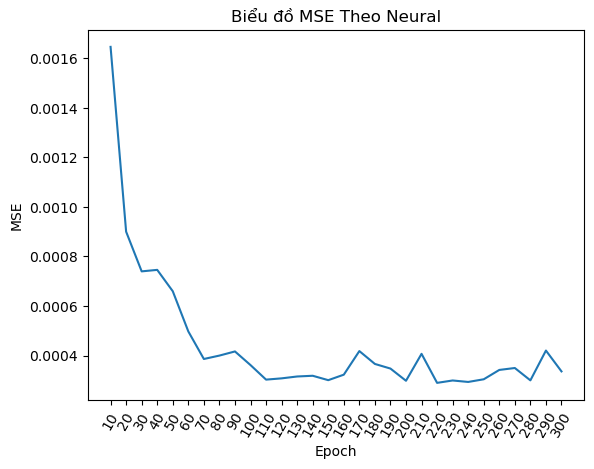

In [43]:
# Vẽ biểu đồ
plt.plot(epochArr, df_MseWith_Neural[['MSE']])
plt.title("Biểu đồ MSE Theo Neural")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.xticks(epochArr, rotation=60)
plt.show()